In [1]:
import imageio.v3 as iio

input_image = iio.imread('data/scenario1/scan00743.png')
input_image = input_image / 500.
depth_image = input_image.astype("float32")

In [2]:
from math import radians

from depth_clustering import SpanParams, ProjectionParams, DepthGroundRemover

h_span_params = SpanParams(radians(-180), radians(180), num_beams=870)
v_span_params = SpanParams(radians(-24), radians(2), num_beams=64)
params = ProjectionParams(h_span_params, v_span_params)

remover = DepthGroundRemover(params, window_size=5, ground_remove_angle=radians(5))

angle_image = remover.create_angle_image(depth_image)
smoothed_image = remover.apply_savitsky_golay_smoothing(
    angle_image,
    remover.window_size,
)

In [3]:
%%time
no_ground_image = remover.on_new_object_received(depth_image)

CPU times: user 1.08 s, sys: 9.44 ms, total: 1.09 s
Wall time: 1.09 s


In [4]:
%%time
for _ in range(100):
    no_ground_image = remover.on_new_object_received(depth_image)

CPU times: user 476 ms, sys: 8.63 ms, total: 485 ms
Wall time: 484 ms


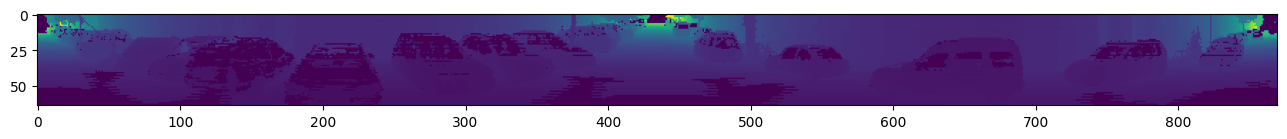

In [5]:
import matplotlib.pyplot as plt

# If you can't change figsize, then run this block again
plt.rcParams['figure.figsize'] = [16, 8]

from IPython.display import Image
from matplotlib.pyplot import imshow

imshow(depth_image)

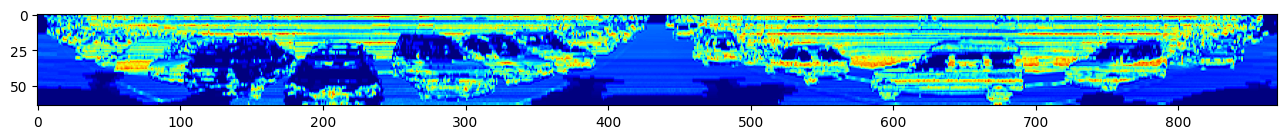

In [6]:
imshow(smoothed_image, cmap="jet", vmin=-0, vmax=1.83)

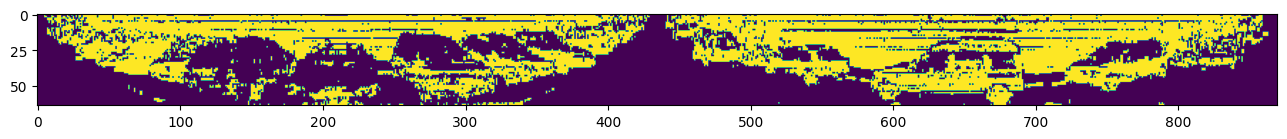

In [7]:
imshow(smoothed_image > radians(30))

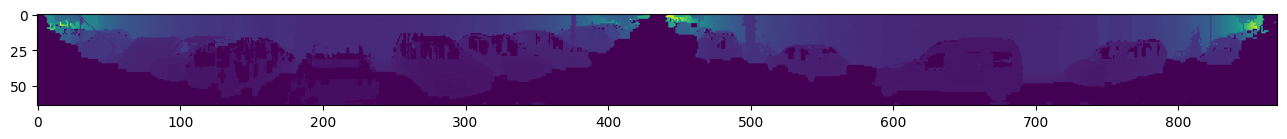

In [8]:
imshow(no_ground_image)